#### --- HEART DISEASE DATASET ---  
> EDA, Data Visualization, MachineLearning  

** **Author**: Danilo Jelovac  
** **Dataset**: Heart Disease Dataset *[[Dataset Kaggle Link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)]* by David Lapp

---

In this notebook, we will analyze, clean, and preprocess the dataset, and visualize the data to make it easier to understand. After preprocessing, we will train several machine learning models to predict Heart Disease (HeartStatus).

The cleaned dataset will be saved, and in a separate script (located in /model_source), we will retrain the best-performing model and save it for later use. This folder will also include a test script to validate the model’s functionality.

I will document each step clearly, so beginners can follow the process, while keeping the code clean and readable.  

---

> -- Let's start by importing neccessary libraries:

In [1]:
# -------
# Imports:
# -------

try:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    print(">. Modules imported successfuly!")
except ModuleNotFoundError:
    print(">. Module import failed!")
    print(">. Try running 'pip install -r requirements.txt' in your terminal.")
    

>. Modules imported successfuly!


> -- Helper functions that reduce lines of code:

In [33]:
# ----------------
# Helper functions:
# ----------------

# -- Scatterplot create funct.:
def create_scatterplot(data: pd.DataFrame, x_axis: str, y_axis: str, hue_col: str, title: str | None = None, plt_size: int = 110):
    """Function for creating scatterplots by inserting data from given dataframe.

    Args:
        data (pd.DataFrame): Dataframe we're using
        x_axis (str): Column we want to present on `x` axis [__]
        y_axis (str): Column we want to present on `y` axis [| ]
        hue_col (str): Third column which will be presented in different colours
        title (str | None, optional): _description_. Defaults to None, used for plot img title.
        plt_size (int): Size of the plot, defaults to 110.
    """
    # -- Generating plot:
    plt.rcParams['figure.dpi'] = plt_size
    sns.set_style('whitegrid')
    
    sns.scatterplot(data=data,
                    x=x_axis, y=y_axis,
                    hue=hue_col)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # -- Returns are separators:
    return '#####'

# -- Histogram create funct.:
def create_histogram(data: pd.DataFrame, x_axis: str, hue_col: str, is_kde: bool = True, title: str | None = None, plt_size: int = 110):
    """Function for creating histograms by inserting data from given dataframe.

    Args:
        data (pd.DataFrame): Dataframe we're using
        x_axis (str): Column we want to present on `x` axis [__]
        hue_col (str): Column which will be presented in different colours
        is_kde (bool, optional): _description_. Defaults to True.
        title (str | None, optional): _description_. Defaults to None, used for plot img title.
        plt_size (int): Size of the plot, defaults to 110.
    """
    # -- Generating plot:
    plt.rcParams['figure.dpi'] = plt_size
    sns.set_style('whitegrid')
    
    sns.histplot(data=data,
                 x=x_axis, hue=hue_col,
                 kde=is_kde, element="step")
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # -- Returns are separators:
    return '#####'

# -- Boxplot create funct.:
def create_boxplot(data: pd.DataFrame, x_axis: str, y_axis: str, color: str = "#69BEFF", title: str | None = None, plt_size: int = 110):
    """Function for creating boxplots by inserting data from given dataframe.

    Args:
        data (pd.DataFrame): Dataframe we're using
        x_axis (str): Column we want to present on `x` axis [__]
        y_axis (str): Column we want to present on `y` axis [| ]
        color (str, optional): _description_. Defaults to "#69BEFF". Color selection, #FFFFFF is white, 
            try chosing other colors by selecting a little rectangle next to the color code.
        title (str | None, optional): _description_. Defaults to None, used for plot img title.
        plt_size (int, optional): _description_. Size of the plot, defaults to 110.
    """
    # -- Generating plot:
    plt.rcParams['figure.dpi'] = plt_size
    sns.set_style('whitegrid')
    
    sns.boxplot(data=data, 
            x=x_axis, y=y_axis,
            color=color)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    # -- Returns are separators:
    return '#####'

# -- For categorical data visualization, multiplots:
def visualize_categoricals(data: pd.DataFrame, column_1: str, column_2: str, 
                           color_1 = '#FFFFFF', color_2 = '#FFFFFF', 
                           title_1: str = '', x_title_1: str = '', y_title_1: str = '',
                           title_2: str = '', x_title_2: str = '', y_title_2: str = ''):
    """Horribly stupid function with a lot of arguments, but will reduce a lot of code.
    It is not the best and the most pythonic solution, but it does the job...
    Anyways, function creates two plots, side by side.
    
    Args:
        data (pd.DataFrame): Data we're using
        column_1 (str): Column for the first plot
        column_2 (str): Column for the second plot
        color_1 (str, optional): First plot color choice. Defaults to '#FFFFFF',
        color_2 (str, optional): Second plot color choice. Defaults to '#FFFFFF',
        title_1 (str, optional): First plot title. Defaults to ''.
        x_title_1 (str, optional): First plot x_axis title. Defaults to ''.
        y_title_1 (str, optional): Frist plot y_axis title. Defaults to ''.
        title_2 (str, optional): Second plot title. Defaults to ''.
        x_title_2 (str, optional): Second plot x_axis title. Defaults to ''.
        y_title_2 (str, optional): Second plot y_axis title. Defaults to ''.

    Returns:
        _type_: Str, '#####' as a separator for visual effect.
    """
    # -- Grid:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.set_style('whitegrid')
    axes = axes.flatten()
    
    # -- Plot#1:
    sns.histplot(data=data[column_1],
                 color=color_1, ax=axes[0],
                 )
    axes[0].set_title(title_1)
    axes[0].set_xlabel(x_title_1)
    axes[0].set_ylabel(y_title_1)
    
    # -- Plot#2:
    sns.histplot(data=data[column_2],
                 color=color_2, ax=axes[1]
                 )
    axes[1].set_title(title_2)
    axes[1].set_xlabel(x_title_2)
    axes[1].set_ylabel(y_title_2)
    
    # -- Return is a separator:
    plt.tight_layout()
    plt.show()
    
    return "#####"

# -- Saving datasets:
def save_dataset(project_folder: str, dataset_folder: str, dataset: pd.DataFrame, dataset_name:str , dataset_type: str = '.csv'):
    """Function for saving cleaned or ML prepared datasets.

    Args:
        project_folder (str): Project folder - Main folder.
        dataset_folder (str): A folder where datasets are.
        dataset_name (str): A name in which dataset will be saved.
        dataset_type (str, optional): File extension. Defaults to '.csv'.
    """
    DATASET_PATH = f'../../{project_folder}/{dataset_folder}/{dataset_name}{dataset_type}'
    # -- to respect the folder hierarchy, we have to jump two folders back by using "../../"...

    try:
        dataset.to_csv(DATASET_PATH, index=False)
        print(f">. Dataset '{dataset_name}{dataset_type}' saved!")
        print(f">. Path: {DATASET_PATH}")
        print("-" * 50)
    except Exception as e:
        print(f"Someting went wrong... Error: {e}")

# -- Saving notebook:
def save_notebook(notebook_name: str, project_folder: str = 'Heart_Disease_Dataset', export_folder: str = 'exports', notebook_type: str = '.html'):
    """_summary_

    Args:
        notebook_name (str): Notebook name
        project_folder (str, optional): Project folder name. Defaults to 'Heart_Disease_Dataset'.
        notebook_folder (str, optional): Notebook folder name. Defaults to 'exports'.
        notebook_type (str, optional): Extension. Defaults to '.html'.
    """
    import os
    
    # -- Current dir (os works from different directory):
    CURRENT_DIRECTORY = "/home/dado/Documents/xPython/x_Portfolio/"
    
    # -- Creating a path // project folder to exports folder:
    EXPORT_PATH = os.path.join(CURRENT_DIRECTORY, project_folder, export_folder)

    # -- Full path to the output HTML:
    NOTEBOOK_BASE_NAME = os.path.splitext(notebook_name)[0]  # removes .ipynb
    output_file = os.path.join(EXPORT_PATH, NOTEBOOK_BASE_NAME + notebook_type)
    
    # -- Exporting...
    try:
        os.system(f"jupyter nbconvert --to html {notebook_name} --output {output_file}")
        print(f">. Notebook saved as: {NOTEBOOK_BASE_NAME}{notebook_type} in '{export_folder}' folder.")
        print(f">. Path: {output_file}")
    except Exception:
        print("#####")
    

> -- Next step is importing a dataset:

In [3]:
# -----------------------------
# Reading and checking the data:
# -----------------------------

PROJECT_FOLDER = 'Heart_Disease_Dataset'
DATASET_LOCATION = 'datasets'
DATASET_NAME = 'heart_disease_raw'
DATASET_TYPE = '.csv'

DATASET_PATH = f'../../{PROJECT_FOLDER}/{DATASET_LOCATION}/{DATASET_NAME}{DATASET_TYPE}'
# -- to respect the folder hierarchy, we have to jump two folders back by using "../../"...


# -- READING DATA:
try:
    df = pd.read_csv(DATASET_PATH)
    print(f">. Dataset '{DATASET_NAME}{DATASET_TYPE}' successfuly loaded! Checking the data...\n")
    display(df.head(5))
except FileNotFoundError:
    print(">. File not found! Please check if the path to dataset is correct and try again.")




>. Dataset 'heart_disease_raw.csv' successfuly loaded! Checking the data...



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


> -- Getting information about dataset:

In [4]:
# ----------
# Basic info:
# ----------

print("\n=== BASIC INFORMATION ===\n")

print("-- Shape (rows, cols):", df.shape)
print("-- Columns:", list(df.columns))

print("\n-- Data Types: ")
display(df.dtypes)

print("\n-- NaNs:")
display(df.isna().sum())



=== BASIC INFORMATION ===

-- Shape (rows, cols): (1025, 14)
-- Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

-- Data Types: 


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


-- NaNs:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> -- Cleaning, fixing and preprocessing data:

In [5]:
# ---------------------
# Column meaning legend:
# ---------------------

# -- age: Age of the patient in years,
# -- sex: Gender of the patient (0: female, 1: male),
# -- cp: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic),
# -- trestbps: Resting blood pressure in mmHg,
# -- chol: Serum cholesterol in mg/dl,
# -- fbs: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true),
# -- restecg: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy),
# -- thalach: Maximum heart rate achieved during a stress test 
# -- exang: Exercise induced angina (0: no, 1: yes),
# -- oldpeak: ST depression induced by exercise relative to rest (unit -> depression),
# -- slope: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping),
# -- ca: Number of major vessels (0-4) colored by fluoroscopy,
# -- thal: Thalium stress test result (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described),
# -- target: Heart disease status (0: no disease, 1: presence of disease).


In [6]:
# --------------
# Columns rename:
# --------------

# -- New 'df' for data security:
df_new = df

# -- Renaming columns for readability:
df_new = df_new.rename(columns={
    "age": "Age",
    "sex": "Sex",
    "cp": "ChestPain",
    "trestbps": "RestBloodPressure",
    "chol": "Cholesterol",
    "fbs": "FastingBloodSugar",
    "restecg": "RestECG",
    "thalach": "MaxHeartRate",
    "exang": "ExerciseAngina",
    "oldpeak": "OldPeak",
    "slope": "PeakSlope",
    "ca": "NumMajorVessels",
    "thal": "ThaliumStressTest",
    "target": "HeartStatus"
})

# -- Check if name change is successful:
print(">>. Column name change:\n")

print("-- Old:\n->", list(df.columns))
print("-- New:\n->", list(df_new.columns))


>>. Column name change:

-- Old:
-> ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
-- New:
-> ['Age', 'Sex', 'ChestPain', 'RestBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseAngina', 'OldPeak', 'PeakSlope', 'NumMajorVessels', 'ThaliumStressTest', 'HeartStatus']


In [7]:
# -------------------------
# Fixing categorical values:
# -------------------------

# -- Let's map the values that need to be changed:
mappings = {
    'Sex': {
            0: 'Female',
            1: 'Male'
            },
    'ChestPain': {
                  0: 'TypicalAngina',
                  1: 'AtypicalAngina',
                  2: 'NonAnginalPain',
                  3: 'Asymptomatic'
                  },
    'FastingBloodSugar': {
                          0: 'NotPresent',
                          1: 'Present'
                          },
    'RestECG': {
                0: 'Normal',
                1: 'Abnormality',
                2: 'Hypertrophy'
                },
    'ExerciseAngina': {
                        0: 'NotInduced',
                        1: 'Induced'
                        },
    'PeakSlope': {
                  0: 'Upsloping',
                  1: 'Flat',
                  2: 'Downsloping'
                  },
    'ThaliumStressTest': {
                          0: 'Normal',
                          1: 'FixedDefect',
                          2: 'ReversibleDefect',
                          3: 'NotDescribed'
                          },
    'HeartStatus': {
               0: 'NoDisease',
               1: 'HeartDisease'
    }
}

# -- Loop to change each col. value:
for col_name, col_values in mappings.items():
        df_new[col_name] = df_new[col_name].map(col_values)
        df_new[col_name] = df_new[col_name].astype('category')

# -- Dataframe check:
print("-- New dataframe check:")
display(df_new.head())

print("-- Data types check:")
display(df_new.dtypes)


-- New dataframe check:


,Age,Sex,ChestPain,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,OldPeak,PeakSlope,NumMajorVessels,ThaliumStressTest,HeartStatus
0,52,Male,TypicalAngina,125,212,NotPresent,Abnormality,168,NotInduced,1.0,Downsloping,2,NotDescribed,NoDisease
1,53,Male,TypicalAngina,140,203,Present,Normal,155,Induced,3.1,Upsloping,0,NotDescribed,NoDisease
2,70,Male,TypicalAngina,145,174,NotPresent,Abnormality,125,Induced,2.6,Upsloping,0,NotDescribed,NoDisease
3,61,Male,TypicalAngina,148,203,NotPresent,Abnormality,161,NotInduced,0.0,Downsloping,1,NotDescribed,NoDisease
4,62,Female,TypicalAngina,138,294,Present,Abnormality,106,NotInduced,1.9,Flat,3,ReversibleDefect,NoDisease


-- Data types check:


Age                     int64
Sex                  category
ChestPain            category
RestBloodPressure       int64
Cholesterol             int64
FastingBloodSugar    category
RestECG              category
MaxHeartRate            int64
ExerciseAngina       category
OldPeak               float64
PeakSlope            category
NumMajorVessels         int64
ThaliumStressTest    category
HeartStatus          category
dtype: object

> -- EDA // Exploratory Data Analysis:

In [8]:
# -------------------------------------------------------
# Exploratory Data Analysis / Value Counts / Categoricals:
# -------------------------------------------------------

print("\n=== VALUE_COUNTS ===\n")

# -- Categorical columns we're displaying:
categorical_columns = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestECG',
                       'ExerciseAngina', 'PeakSlope', 'ThaliumStressTest',
                       'HeartStatus']

# -- Let's create functions to reduce amount of code:
def value_count_analysis(df: pd.DataFrame, column_name: str) -> str:
    """Creating a more eye-catching version of .value_counts
    for optimized readability.

    Args:
        df (pd.DataFrame): Name of the dataframe you're working with.
        column_name (str): Name of the column you need values displayed.

    Returns:
        _type_: str - Returning '#####' for better display.
    """
    
    print(f"-- '{column_name}' value counts:\n{30*"-"}")
    
    for item, count in df[column_name].value_counts().items():
        print(f">. {item} - [{count}]")
        
    print(30*"-")
    
    return "#####"

# -- Let's pipe previous function to reduce amount of repeated code:
def value_count_analysis_pipe(df: pd.DataFrame, cols_to_display: list) -> None:
    """Creating a pipe to represent all of the categorical columns
    in optimized .value_count. In short - reducing repeated code and
    trying to make this more 'pythonic'.

    Args:
        df (pd.DataFrame): Name of the dataframe you're working with.
        In this case, it's 'df_new' since I am trying 
    """
    
    for column in cols_to_display:
        display(value_count_analysis(df, column))

# -- Showing data as text:
value_count_analysis_pipe(df_new, categorical_columns)



=== VALUE_COUNTS ===

-- 'Sex' value counts:
------------------------------
>. Male - [713]
>. Female - [312]
------------------------------


'#####'

-- 'ChestPain' value counts:
------------------------------
>. TypicalAngina - [497]
>. NonAnginalPain - [284]
>. AtypicalAngina - [167]
>. Asymptomatic - [77]
------------------------------


'#####'

-- 'FastingBloodSugar' value counts:
------------------------------
>. NotPresent - [872]
>. Present - [153]
------------------------------


'#####'

-- 'RestECG' value counts:
------------------------------
>. Abnormality - [513]
>. Normal - [497]
>. Hypertrophy - [15]
------------------------------


'#####'

-- 'ExerciseAngina' value counts:
------------------------------
>. NotInduced - [680]
>. Induced - [345]
------------------------------


'#####'

-- 'PeakSlope' value counts:
------------------------------
>. Flat - [482]
>. Downsloping - [469]
>. Upsloping - [74]
------------------------------


'#####'

-- 'ThaliumStressTest' value counts:
------------------------------
>. ReversibleDefect - [544]
>. NotDescribed - [410]
>. FixedDefect - [64]
>. Normal - [7]
------------------------------


'#####'

-- 'HeartStatus' value counts:
------------------------------
>. HeartDisease - [526]
>. NoDisease - [499]
------------------------------


'#####'


=== VIZUALIZATION ===



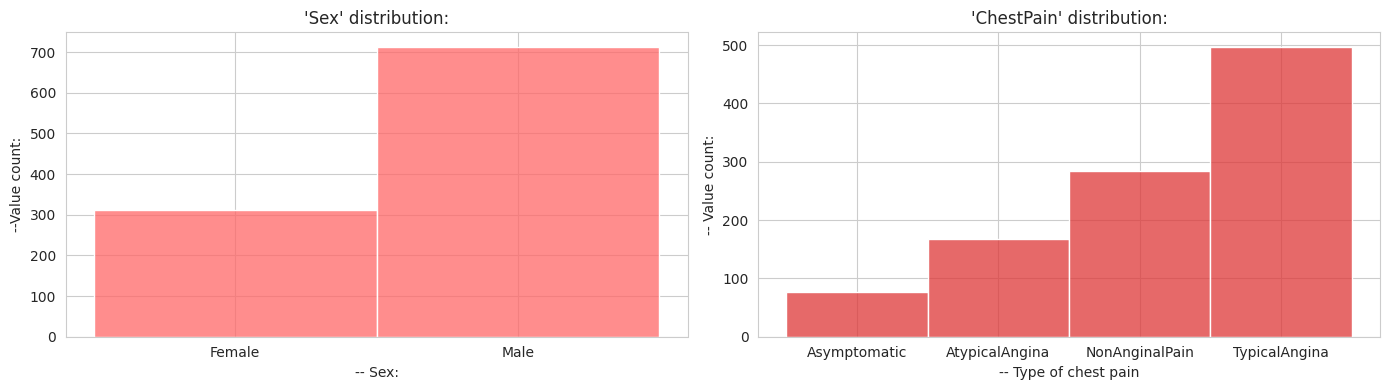

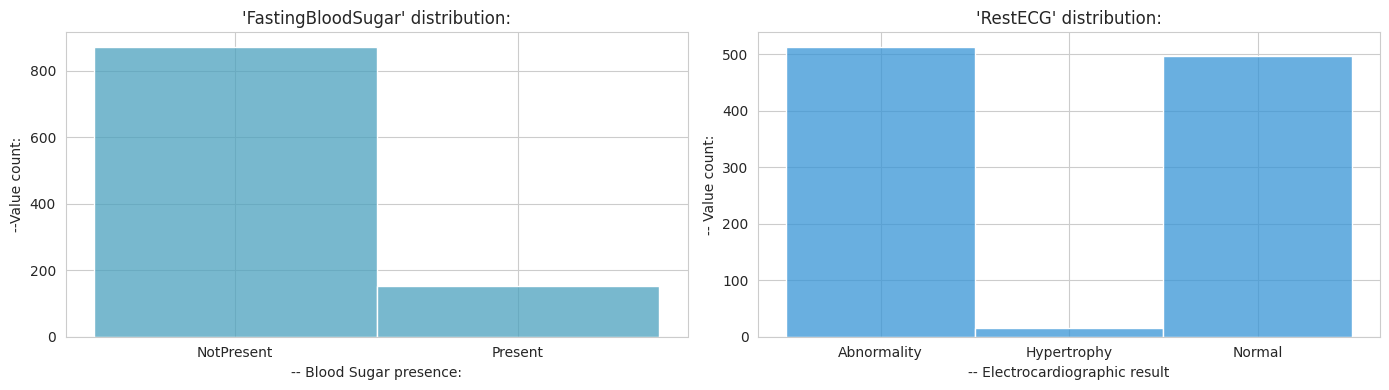

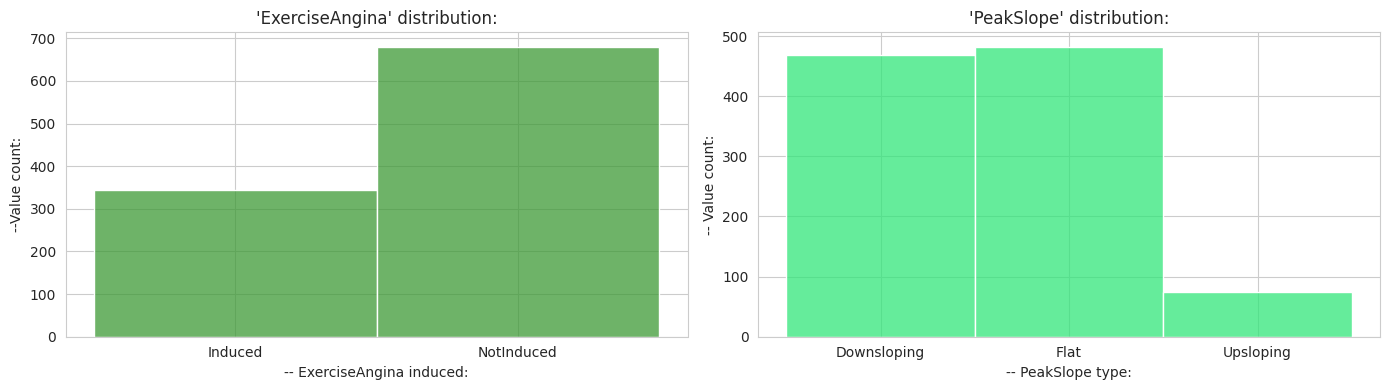

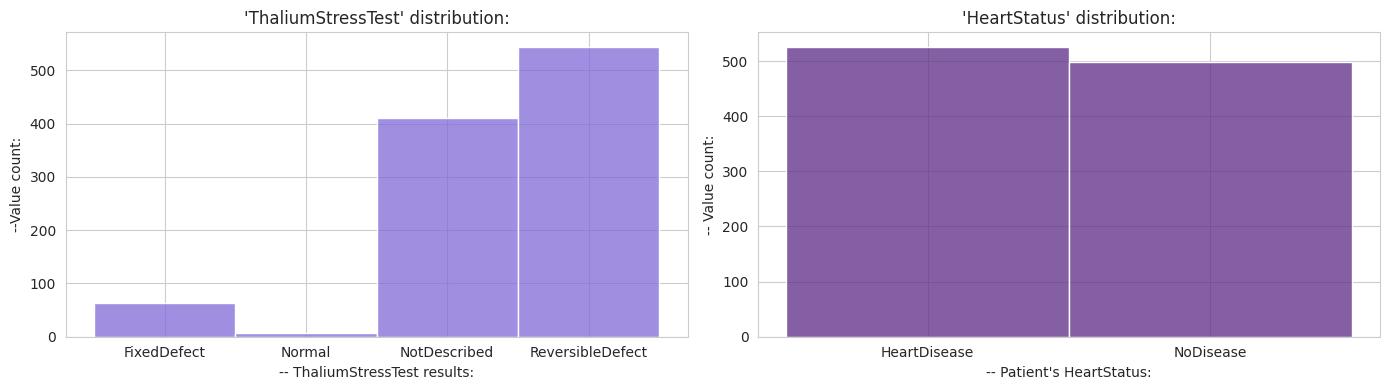

'#####'

In [34]:
# ---------------------------
# Visualizing previous values:
# ---------------------------

# -- Title:
print("\n=== VIZUALIZATION ===\n")

# -- Row#1: Distribution by 'Sex' and 'ChestPain' type:
visualize_categoricals(df_new, 'Sex', 'ChestPain', '#FF6767', '#DE3737',
                       "'Sex' distribution:", "-- Sex:", "--Value count:",
                       "'ChestPain' distribution:", "-- Type of chest pain", "-- Value count:")

# --Row#2: Distribution by 'FastingBloodSugar' presence and 'RestECG' type:
visualize_categoricals(df_new, 'FastingBloodSugar', 'RestECG', '#4BA1BE', '#3794D6',
                       "'FastingBloodSugar' distribution:", "-- Blood Sugar presence:", "--Value count:",
                       "'RestECG' distribution:", "-- Electrocardiographic result", "-- Value count:")

# --Row#3: Distribution by 'ExerciseAngina' induction and 'PeakSlope' type:
visualize_categoricals(df_new, 'ExerciseAngina', 'PeakSlope', '#3E9A36', '#32E67A',
                       "'ExerciseAngina' distribution:", "-- ExerciseAngina induced:", "--Value count:",
                       "'PeakSlope' distribution:", "-- PeakSlope type:", "-- Value count:")

# --Row#4: Distribution by 'ThaliumStressTest' result and 'HeartStatus' of patient's heart:
visualize_categoricals(df_new, 'ThaliumStressTest', 'HeartStatus', "#806AD8", "#5C2A85",
                       "'ThaliumStressTest' distribution:", "-- ThaliumStressTest results:", "--Value count:",
                       "'HeartStatus' distribution:", "-- Patient's HeartStatus:", "-- Value count:")




In [10]:
# ------------
# Observations:
# ------------

# -- There are significantly more male patients than female patients.
# -- TypicalAngina is the most common type of ChestPain.
# -- Majority of the patients have no issue with high blood sugar levels.
# -- Normal and Abnormal RestECG are two extremes in this column analysis.
# -- NotInduced Angina leads in ExerciseAngina distribution. Patients who exercise are more healthy!
# -- Regarding EKGs: Downsloping or Flat is the most common occurence in these results.
# -- ThaliumStressTest distribution show that most common defects are reversible ones.
# -- Number of patients with heart disease is very close to healthy patients. Higher, but close.



==== Oldest vs Youngest ====

-- Oldest person data:


Age                                77
Sex                              Male
ChestPain               TypicalAngina
RestBloodPressure                 125
Cholesterol                       304
FastingBloodSugar          NotPresent
RestECG                        Normal
MaxHeartRate                      162
ExerciseAngina                Induced
OldPeak                           0.0
PeakSlope                 Downsloping
NumMajorVessels                     3
ThaliumStressTest    ReversibleDefect
HeartStatus                 NoDisease
Name: 160, dtype: object

-- Youngest person data:


Age                                29
Sex                              Male
ChestPain              AtypicalAngina
RestBloodPressure                 130
Cholesterol                       204
FastingBloodSugar          NotPresent
RestECG                        Normal
MaxHeartRate                      202
ExerciseAngina             NotInduced
OldPeak                           0.0
PeakSlope                 Downsloping
NumMajorVessels                     0
ThaliumStressTest    ReversibleDefect
HeartStatus              HeartDisease
Name: 60, dtype: object

'#####'


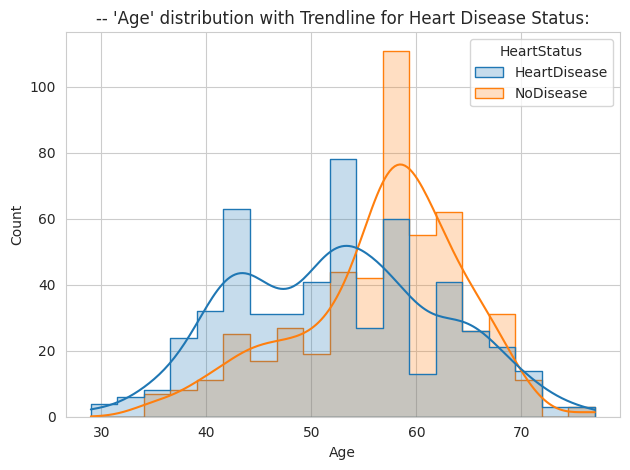

'#####'

In [11]:
# ----------------------------
# Youngest and oldest analysis:
# ----------------------------

# -- Title:
print("\n==== Oldest vs Youngest ====\n")

# -- Setting data in varables, displaying data:
oldest = df_new.loc[df_new['Age'].idxmax()]
youngest = df_new.loc[df_new['Age'].idxmin()]

print("-- Oldest person data:")
display(oldest)

print("-- Youngest person data:")
display(youngest)
print("'#####'")

# -- Visualizing observations:
hist_title_1 = "-- 'Age' distribution with Trendline for Heart Disease Status:"
create_histogram(df_new, 'Age', 'HeartStatus', title=hist_title_1, plt_size=100)


In [12]:
# ------------
# Observations:
# ------------

# -- It's interesting that oldest person has no heart disease, yet youngest one does. An indicator to check whether 'Age' affects 'Status'.
# -- People around 40 and 55 are most likely to have a bad heart condition. After that age, the slope drops, showing that older patients tend
#    to have a healthier heart. People around 60 yrs. old have the healthiest heart.



==== CORRELATION VISUALIZATION | FURTHER EXPLORATORY ANALYSIS | CATEGORICALS v HEART STATUS ====



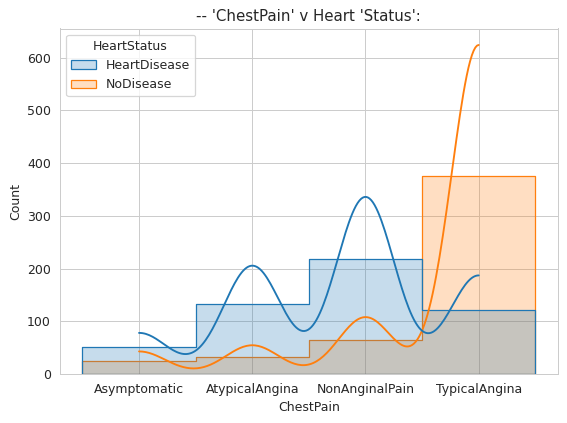

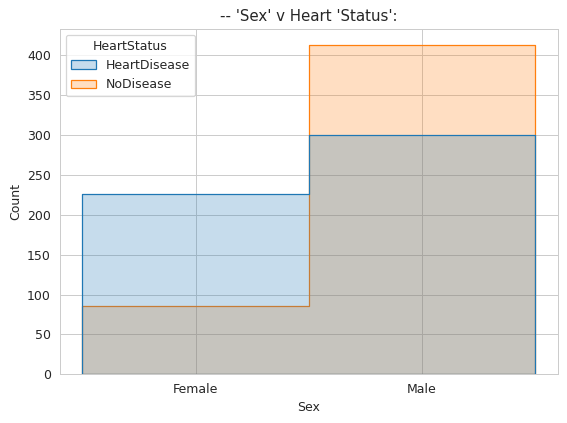

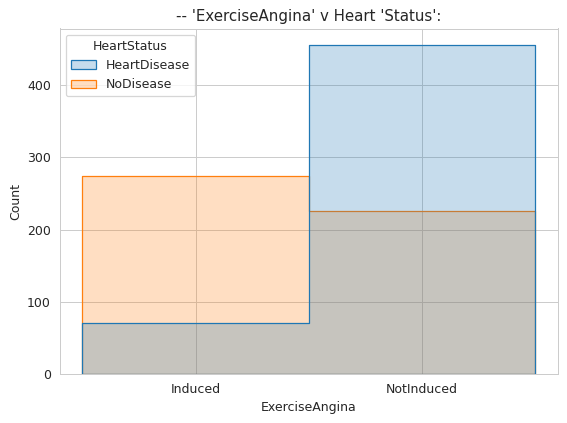

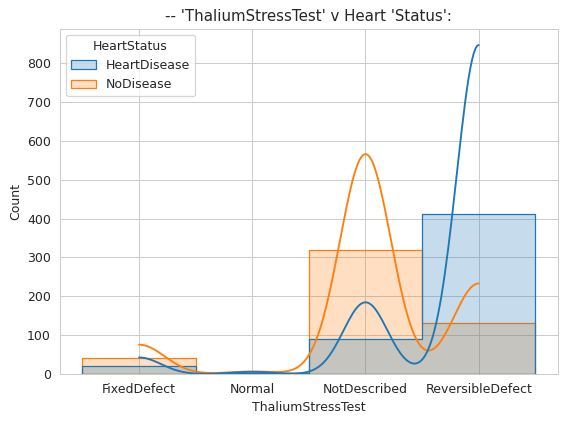

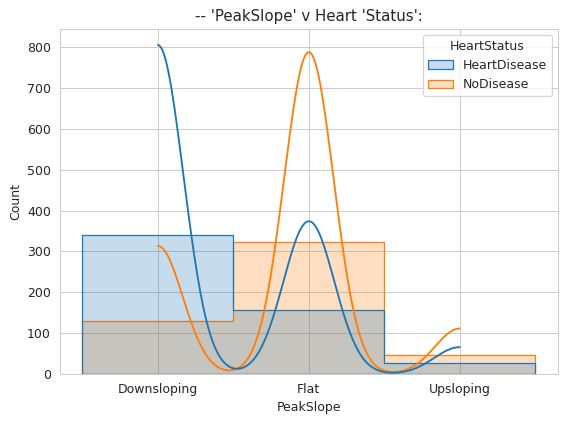

'#####'

In [13]:
# -------------------------------------------------
# Correlation visualization / Categories v 'Status':
# -------------------------------------------------

# -- Title:
print("\n==== CORRELATION VISUALIZATION | FURTHER EXPLORATORY ANALYSIS | CATEGORICALS v HEART STATUS ====\n")

# -- Plot titles:
cp_v_st_ttl = "-- 'ChestPain' v Heart 'Status':"
sex_v_st_ttl = "-- 'Sex' v Heart 'Status':"
ean_v_st_ttl = "-- 'ExerciseAngina' v Heart 'Status':"
tst_v_st_ttl = "-- 'ThaliumStressTest' v Heart 'Status':"
ps_v_st_ttl = "-- 'PeakSlope' v Heart 'Status':"


# -- ChestPain v Heart Status:
create_histogram(df_new, 'ChestPain', 'HeartStatus', title=cp_v_st_ttl, plt_size=90)

# -- Sex v Heart Status:
create_histogram(df_new, 'Sex', 'HeartStatus', is_kde=False, title=sex_v_st_ttl, plt_size=90)

# -- ExerciseAngina v Heart Status:
create_histogram(df_new, 'ExerciseAngina', 'HeartStatus', is_kde=False, title=ean_v_st_ttl, plt_size=90)

# -- ThaliumStressTest v Heart Status:
create_histogram(df_new, 'ThaliumStressTest', 'HeartStatus', title=tst_v_st_ttl, plt_size=90)

# -- PeakSlope v Heart Status:
create_histogram(df_new, 'PeakSlope', 'HeartStatus', title=ps_v_st_ttl, plt_size=90)



In [14]:
# ------------
# Observations:
# ------------

# -- People with 'TypicalAngina' are less likely to have a bad heart condition. People with 'AtypicalAngina' and with 'NonAnginalPains' are more
#    likely to have a bad heart condition.
# -- 'Male' patients are more likely to develop a heart condition than 'Female' patients. Graph also shows that there are much more 'Male' patients
#    subjegated to heart health tests.
# -- Much more heart diseases are induced by not exercising than by exercising. Exercise induced anginas are much less common than non exercise 
#    induced ones.
# -- People with ReversibleDefect after ThaliumStressTest are much more likely to have a bad heart condition. The 'NotDescribed' category shows the
#    most healthy hearts.
# -- According to 'PeakSlope', people in Downloping category are much more likely to have a bad heart condition. The 'FlatPeakSlope' patients are
#    the ones with most healthy hearts.



-- Statistical summary:


,Age,RestBloodPressure,Cholesterol,MaxHeartRate,OldPeak,NumMajorVessels
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000



-- Correlations:


'1. Pearson:'

,Age,RestBloodPressure,Cholesterol,MaxHeartRate,OldPeak,NumMajorVessels
Age,1.000000,0.271121,0.219823,-0.390227,0.208137,0.271551
RestBloodPressure,0.271121,1.000000,0.127977,-0.039264,0.187434,0.104554
Cholesterol,0.219823,0.127977,1.000000,-0.021772,0.064880,0.074259
MaxHeartRate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,-0.207888
OldPeak,0.208137,0.187434,0.064880,-0.349796,1.000000,0.221816
NumMajorVessels,0.271551,0.104554,0.074259,-0.207888,0.221816,1.000000


'2. Kendall:'

,Age,RestBloodPressure,Cholesterol,MaxHeartRate,OldPeak,NumMajorVessels
Age,1.000000,0.196697,0.140323,-0.269678,0.190421,0.272280
RestBloodPressure,0.196697,1.000000,0.086805,-0.019825,0.103829,0.071111
Cholesterol,0.140323,0.086805,1.000000,-0.036767,0.043871,0.091229
MaxHeartRate,-0.269678,-0.019825,-0.036767,1.000000,-0.311035,-0.196154
OldPeak,0.190421,0.103829,0.043871,-0.311035,1.000000,0.186809
NumMajorVessels,0.272280,0.071111,0.091229,-0.196154,0.186809,1.000000


'3. Spearman:'

,Age,RestBloodPressure,Cholesterol,MaxHeartRate,OldPeak,NumMajorVessels
Age,1.000000,0.280189,0.203253,-0.382724,0.264500,0.339808
RestBloodPressure,0.280189,1.000000,0.127010,-0.028880,0.146722,0.091323
Cholesterol,0.203253,0.127010,1.000000,-0.054794,0.057102,0.114584
MaxHeartRate,-0.382724,-0.028880,-0.054794,1.000000,-0.439987,-0.254775
OldPeak,0.264500,0.146722,0.057102,-0.439987,1.000000,0.230183
NumMajorVessels,0.339808,0.091323,0.114584,-0.254775,0.230183,1.000000



-- Correlation vizualized:

-- 1 . Pearson:


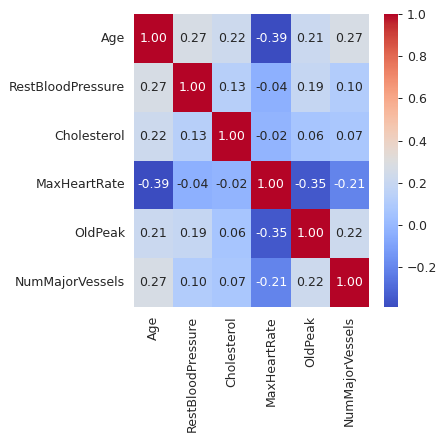

-- 2 . Kendall:


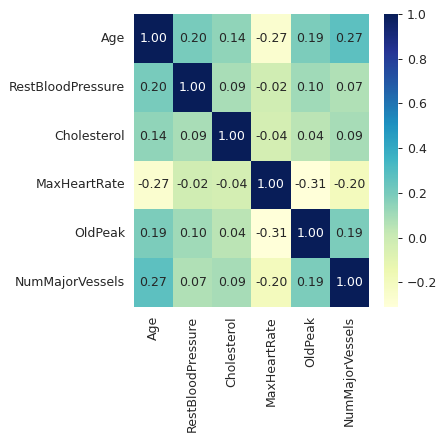

-- 3 . Spearman:


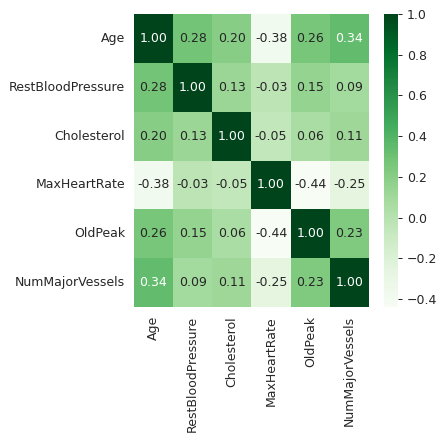

In [15]:
# --------------------------------------
# Exploratory Data Analysis / Numericals:
# --------------------------------------

numerical_columns = ['Age', 'RestBloodPressure', 'Cholesterol', 
                     'MaxHeartRate', 'OldPeak', 'NumMajorVessels']
corr_methods = ['pearson', 'kendall', 'spearman']  # -- different correlation methods
manual_enumeration = [1, 2, 3]  # -- used to enumerate correlation methods
cmap_list = ['coolwarm', 'YlGnBu', 'Greens']  # -- colors for corr visual

# -- Statistical analysis:
print("\n-- Statistical summary:")
display(df_new.describe())

# -- Correlation analysis:
print("\n-- Correlations:")
for enum, corr in zip(manual_enumeration, corr_methods):
    display(f"{enum}. {corr.capitalize()}:", df_new[numerical_columns].corr(method=corr))
    
# -- Correlation analysis vizualized:
print("\n-- Correlation vizualized:\n")

for enum_, cmethod_, cmap_ in zip(manual_enumeration, corr_methods, cmap_list):
    
    print("--", enum_, ".", cmethod_.capitalize() + ":")
    
    plt.figure(figsize=(5,5))
    sns.set_style("whitegrid")

    sns.heatmap(data=df_new[numerical_columns].corr(method=cmethod_), 
                cmap=cmap_, annot=True, fmt='.2f')
    
    plt.tight_layout()
    
    plt.show()



In [16]:
# ------------
# Observations:
# ------------

# -- Some observations according to 'Pearson' matrix:

# -- 'Age' v 'MaxHeartRate': moderate negative corr. This means that 'MaxHeartRate' tends to decrease with 'Age' increase.
# -- 'Age' v 'NumMajorVessels': moderate positive corr. This means that there is a possibility that older patients will have more major vessels affected.
# -- 'MaxHeartRate' v 'OldPeak': moderate negative corr. This means higher heart rate will affect lower ST depression.
# -- Most other features show weak correlations and have little relationship between them.

# -- 'Kendall' matrix shows similar results to first, 'Pearson' matrix, but in more stricter nature.
# -- 'Spearman' matrix confirms validity of prior matrixes.


==== CORRELATION | FURTHER EXPLORATORY ANALYSIS | NUMERICALS v HEART STATUS ====

-- Corr according to 'HeartStatus:


HeartStatusBinary    1.000000
MaxHeartRate         0.422895
Cholesterol         -0.099966
RestBloodPressure   -0.138772
Age                 -0.229324
NumMajorVessels     -0.382085
OldPeak             -0.438441
Name: HeartStatusBinary, dtype: float64


==== VISUALIZATIONS ====



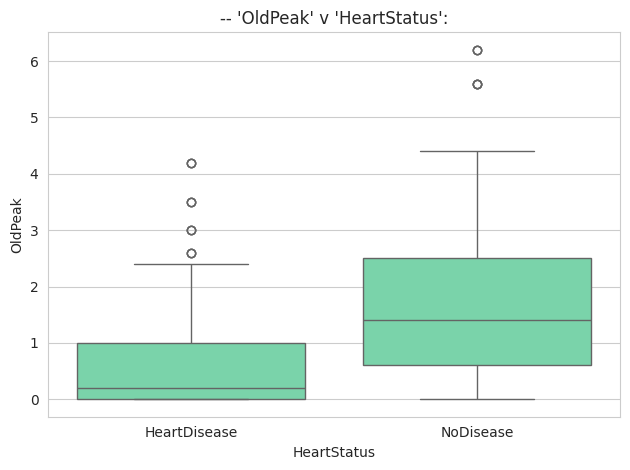

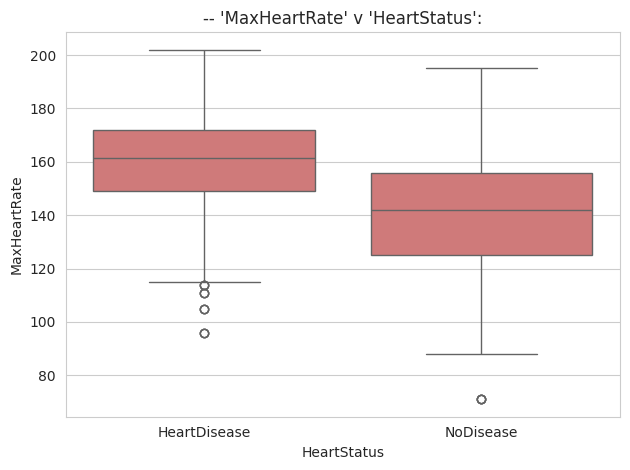

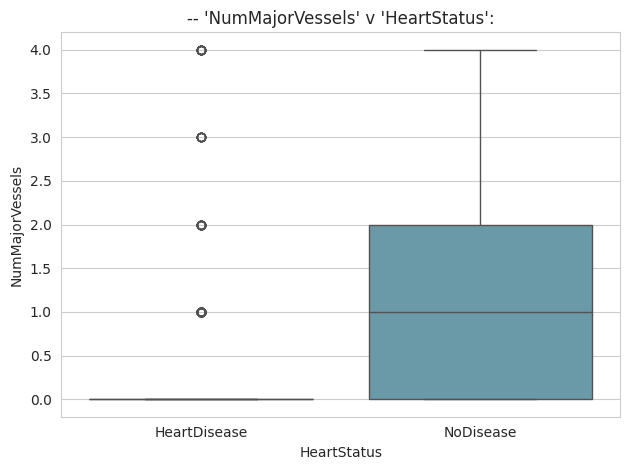

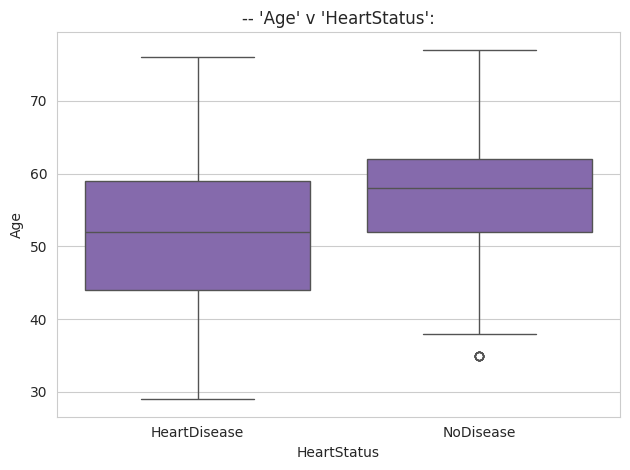

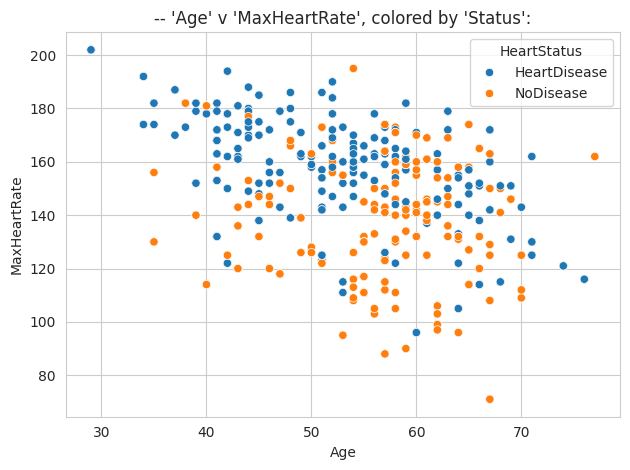

'#####'

In [17]:
# -------------------------------
# Correlation with heart 'Status':
# -------------------------------

# -- Title:
print("\n==== CORRELATION | FURTHER EXPLORATORY ANALYSIS | NUMERICALS v HEART STATUS ====\n")

# -- Add numerical HeartStatus column:
df_new['HeartStatusBinary'] = df_new['HeartStatus'].map({'HeartDisease': 1, 'NoDisease': 0})

# -- Displaying correlation:
print("-- Corr according to 'HeartStatus:")
target_corr = df_new[numerical_columns + ['HeartStatusBinary']].corr()['HeartStatusBinary'].sort_values(ascending=False)
display(target_corr)

# -- Visualizing observations:

print("\n==== VISUALIZATIONS ====\n")

# -- Plot titles:
op_v_hs_ttl = "-- 'OldPeak' v 'HeartStatus':"
mhr_v_hs_ttl = "-- 'MaxHeartRate' v 'HeartStatus':"
nmv_v_hs_ttl = "-- 'NumMajorVessels' v 'HeartStatus':"
age_v_hs_ttl = "-- 'Age' v 'HeartStatus':"
age_v_mhr_ttl = "-- 'Age' v 'MaxHeartRate', colored by 'Status':"

# -- 'OldPeak' v 'HeartStatus':
create_boxplot(df_new, 'HeartStatus', 'OldPeak', "#6BE2AB", op_v_hs_ttl, 100)

# -- 'MaxHeartRate' v 'HeartStatus':
create_boxplot(df_new, 'HeartStatus', 'MaxHeartRate', "#DD6C6C", mhr_v_hs_ttl, 100)

# -- 'NumMajorVessels' v 'HeartStatus':
create_boxplot(df_new, 'HeartStatus', 'NumMajorVessels', "#60A0B2", nmv_v_hs_ttl, 100)

# -- 'Age' v 'HeartStatus':
create_boxplot(df_new, 'HeartStatus', 'Age', "#835FB7", age_v_hs_ttl, 100)

# -- Age v MaxHeartRate:
create_scatterplot(df_new, 'Age', 'MaxHeartRate', 'HeartStatus', title=age_v_mhr_ttl, plt_size=100)

In [18]:
#-------------
# Observations:
# ------------

# -- VERY IMPORTANT NOTE: Some features, such as 'OldPeak' and 'NumMajorVessels', have counter-intuitive distributions: 
#    e.g., some 'NoDisease' patients have higher 'OldPeak' than 'HeartDisease' patients. This is expected in real medical 
#    datasets due to measurement variability, individual physiological differences, and noise in diagnostic tests. Correlations 
#    indicate trends but not deterministic relationships. Bear this in mind when reading this dataset.

# -- 'MaxHeartRate' shows moderate positive correlation (+0.42), suggesting that higher max heart rate is related to lower disease risk. 
# -- 'OldPeak' has the strongest negative correlation (-0.44), indicating that higher ST depression is associated with HeartDisease.
# -- 'NumMajorVessels' also moderately negatively correlates (-0.38), meaning more affected vessels increase risk.
# -- Rest of the data show weak correlations (<0.25), indicating limited and very small influence on 'HeartDisease' income.

# -- Reading visualizations:

# -- Higher 'OldPeak' indicates that people with `wavy` EKG-s can show healty hearts, and vice-versa. Approach this data with caution!
# -- As 'MaxHeartRate' increases, we can see that the risk of having a HeartDisease is bigger.
# -- We can see that 'NumMajorVessels' can easily be valued at 0, and yet patients heart can be in bad health. Also, we can see that some healthy
#    patients have affected vessels. PLEASE: Interpret this data with caution.
# -- As it's previously shown: patients aged 45 - 60 are affected the most. As mentioned before - stress can be a leading factor since this age
#    class are mosly working patients (not in pension). 
# -- According to 'MaxHeartRate': the bigger the heart rate, it's more likely for patient to have a bad heart condition. Also, this chart also
#    shows that older people have much smaller heart rate than younger patients, possibly indicating that stress is one of the factors in heart
#    disease (people 40 to 55 yrs. are working class people).


> -- Machine Learning:

In [19]:
# ---------------------------
# ML part: Required libraries:
# ---------------------------

# -- Importing scikit-learn libraries:

try:
    from sklearn.model_selection import train_test_split
    
    from sklearn.preprocessing import (MinMaxScaler, OneHotEncoder)
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import LinearSVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    
    from sklearn.metrics import classification_report
    from sklearn.metrics import ConfusionMatrixDisplay

    print(">. 'scikit-learn' libraries imported successfuly!")
except ModuleNotFoundError:
    print("Modules not found! Please check if modules are installed.")
    print("Check 'README.md' under 'Requirements' for info.")
    

>. 'scikit-learn' libraries imported successfuly!


In [20]:
# ---------------------------------------
# ML part: Preparing dataset for training:
# ---------------------------------------

# -- New dataset prepared for machine learning:
df_ml = df_new.drop(columns='HeartStatus')

# -- Displaying new dataset:
print("-- Machine Learning Ready Dataset:")
display(df_ml.head())

print("-- Machine Learning Ready Data Types:")
display(df_ml.dtypes)


-- Machine Learning Ready Dataset:


,Age,Sex,ChestPain,RestBloodPressure,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,OldPeak,PeakSlope,NumMajorVessels,ThaliumStressTest,HeartStatusBinary
0,52,Male,TypicalAngina,125,212,NotPresent,Abnormality,168,NotInduced,1.0,Downsloping,2,NotDescribed,0
1,53,Male,TypicalAngina,140,203,Present,Normal,155,Induced,3.1,Upsloping,0,NotDescribed,0
2,70,Male,TypicalAngina,145,174,NotPresent,Abnormality,125,Induced,2.6,Upsloping,0,NotDescribed,0
3,61,Male,TypicalAngina,148,203,NotPresent,Abnormality,161,NotInduced,0.0,Downsloping,1,NotDescribed,0
4,62,Female,TypicalAngina,138,294,Present,Abnormality,106,NotInduced,1.9,Flat,3,ReversibleDefect,0


-- Machine Learning Ready Data Types:


Age                     int64
Sex                  category
ChestPain            category
RestBloodPressure       int64
Cholesterol             int64
FastingBloodSugar    category
RestECG              category
MaxHeartRate            int64
ExerciseAngina       category
OldPeak               float64
PeakSlope            category
NumMajorVessels         int64
ThaliumStressTest    category
HeartStatusBinary    category
dtype: object

In [21]:
# ------------------------
# ML part: Training models:
# ------------------------

# -- Inital title:
print("\n ==== MODEL CLASSIFICATION REPORT ====\n")

# -- Selecting input data, what model will use to learn relationship with outcome:
input_data = df_ml.drop(columns='HeartStatusBinary')

# -- Output data: our outcome... In this case - HeartDisease or NoDisease (1 or 0):
output_data = df_ml['HeartStatusBinary']

# -- Separating data into inputs `X` and output `y`:
X = input_data
y = output_data

# -- Splitting data 80:20 for training and testing at the same time:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# -- Preprocessing data (preparation so model can understand it):
categorical_data = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestECG',
                    'ExerciseAngina', 'PeakSlope', 'ThaliumStressTest',]
numerical_data = ['Age', 'RestBloodPressure', 'Cholesterol', 
                  'MaxHeartRate', 'OldPeak', 'NumMajorVessels']

preprocessing = ColumnTransformer(transformers=[
    ('CategoricalData', OneHotEncoder(handle_unknown='ignore'), categorical_data),
    ('NumericalData', MinMaxScaler(), numerical_data)
])


# -- Our chosen models:
ml_models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'LinearSVC': LinearSVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'NaiveBayes': MultinomialNB()
}

# -- Storing results:
ml_results = {}
trained_models = {}


# -- Machine Learning Process:
for model_name, model in ml_models.items():
    # -- Display model name:
    print(f"\n-- [{model_name}] --\n{'-'*42}")
    
    # -- Initial steps: preprocessing and model selection:
    model_pipeline = Pipeline(steps=[
        ('Preprocessing', preprocessing),
        ('Model', model)
    ])
    
    # -- Training model...
    model_pipeline.fit(X_train, y_train)
    
    # -- Model prediction:
    model_prediction = model_pipeline.predict(X_test)

    # -- REPORT:
    print(classification_report(y_test, model_prediction), "\n", "-"*42)    
    
    # -- Saving accuracy data in ml_results:
    ml_results[model_name] = model_pipeline.score(X_test, y_test)
    
    # Save trained pipeline
    trained_models[model_name] = model_pipeline
    


 ==== MODEL CLASSIFICATION REPORT ====


-- [LogisticRegression] --
------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       102
           1       0.77      0.86      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205
 
 ------------------------------------------

-- [LinearSVC] --
------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205
 
 ------------------------------------------

-- [DecisionTree] --
------------------------------------------
              pre


=== MODEL ACCURACY RANKING ===

------------------------------
DecisionTree: 0.99 accuracy.
RandomForest: 0.99 accuracy.
NaiveBayes: 0.83 accuracy.
LinearSVC: 0.82 accuracy.
LogisticRegression: 0.80 accuracy.
------------------------------


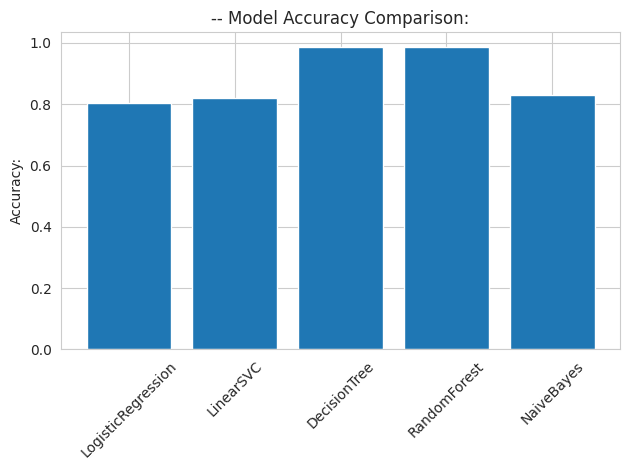

------------------------------


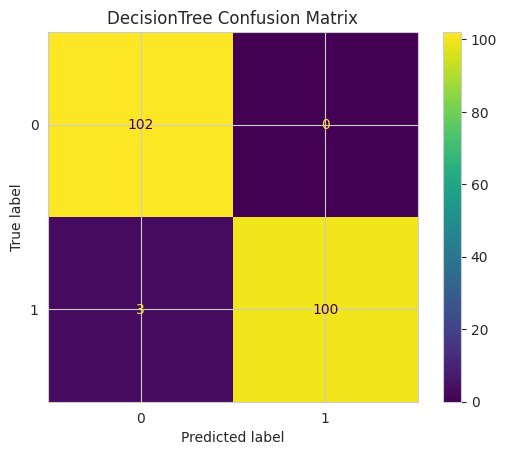

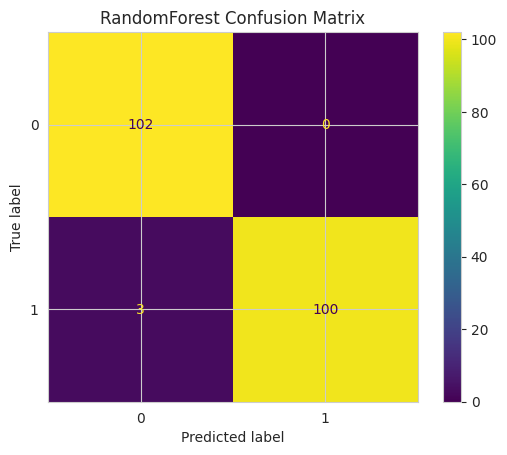

In [22]:
# -----------------------
# ML part: Model rankings:
# -----------------------

print("\n=== MODEL ACCURACY RANKING ===\n")
print("-" * 30)

for model_name, score in sorted(ml_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model_name}: {score:.2f} accuracy.")

print("-" * 30)

# -- Results visualization:
names = list(ml_results.keys())
scores = list(ml_results.values())

plt.rcParams['figure.dpi'] = 100
plt.bar(names, scores)
plt.title("-- Model Accuracy Comparison:")
plt.ylabel("Accuracy:")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("-" * 30)

# -- Top 2 models:
ConfusionMatrixDisplay.from_estimator(trained_models['DecisionTree'], X_test, y_test)
plt.title("DecisionTree Confusion Matrix")
plt.show()

ConfusionMatrixDisplay.from_estimator(trained_models['RandomForest'], X_test, y_test)
plt.title("RandomForest Confusion Matrix")
plt.show()


In [23]:
# -- Model choice is: 'RandomForest'. Reasons for this is that it's less likely to `overfit` and it works better with new data.
# -- It's worth to mention that DecisionTree scored absolutely identical.

> -- Saving cleaned datasets:

In [35]:
# -----------------
# Saving dataframes:
# -----------------

# -- Info:
# PROJECT_FOLDER = 'Heart_Disease_Dataset'
# DATASET_LOCATION = 'datasets'
# DATASET_NAME = 'heart_disease_raw'
# DATASET_TYPE = '.csv'

# -- Saving:
CLEAN_DF_NAME = 'heart_disease_clean'
ML_DF_NAME = 'heart_disease_ml'

save_dataset(PROJECT_FOLDER, DATASET_LOCATION, df_new, CLEAN_DF_NAME)
save_dataset(PROJECT_FOLDER, DATASET_LOCATION, df_ml, ML_DF_NAME)
save_notebook('heart_disease_eda.ipynb')


>. Dataset 'heart_disease_clean.csv' saved!
>. Path: ../../Heart_Disease_Dataset/datasets/heart_disease_clean.csv
--------------------------------------------------
>. Dataset 'heart_disease_ml.csv' saved!
>. Path: ../../Heart_Disease_Dataset/datasets/heart_disease_ml.csv
--------------------------------------------------


[NbConvertApp] Converting notebook heart_disease_eda.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 21 image(s).
[NbConvertApp] Writing 1319981 bytes to /home/dado/Documents/xPython/x_Portfolio/Heart_Disease_Dataset/exports/heart_disease_eda.html


>. Notebook saved as: heart_disease_eda.html in 'exports' folder.
>. Path: /home/dado/Documents/xPython/x_Portfolio/Heart_Disease_Dataset/exports/heart_disease_eda.html


> -- Overall conclusion:

- This dataset was a challenging one. Number #1 reason is the column names which, originally, were very unreadable. Also, they represent medical terms which took some time to explore and understand.
- It needs to be noted that this dataset represented realistic values and a completely natural outcomes e.g. patients with healthy vessels can be victims of faulty heart.
- A trend that I noticed is that older people tend to take care of their health much more and suffer much less coronary diseases, which is a plus. Also, younger generations tend to have more heart problems which means that it's most probably stress induced.


> -- About the author:

**Danilo Jelovac** — Aspiring Data Analyst & Python Developer  
Focused on clean, understandable code and data-driven storytelling. 

> Portfolio: *[[GitHub link](https://github.com/d-jlvc/data-ml-portfolio)]*  
> LinkedIn: *[[LinkedIn link](https://www.linkedin.com/in/danilo-jelovac-b1b7a5396/)]*  